In [ ]:
#qn2
import pandas as pd
data=pd.read_csv("titanic.csv")


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

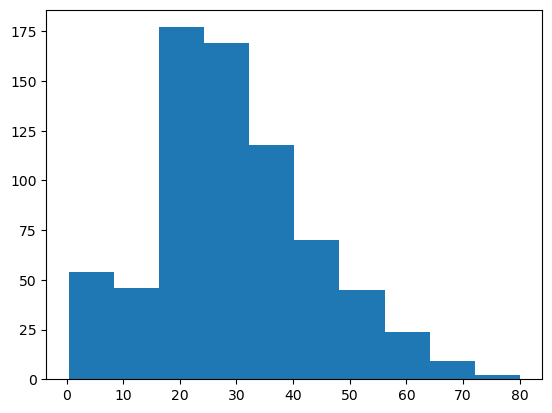

In [7]:
#qn3(univariate anlaysis)
import matplotlib.pyplot as plt
plt.hist(data['age'])

In [2]:
#qn3(bivariate anlaysis)
import matplotlib.pyplot as plt
plt.bar(data['class'],data['fare'])

NameError: name 'data' is not defined

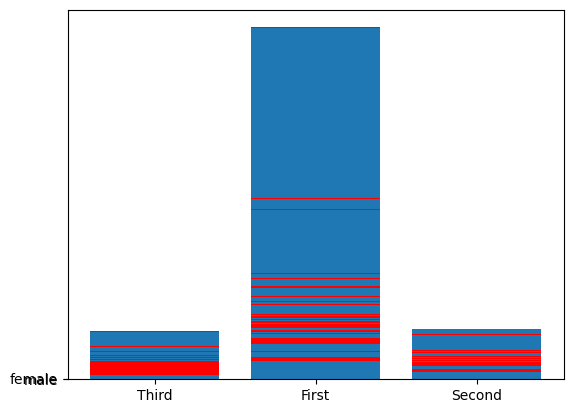

In [19]:
#qn3(multivariate anlaysis)
plt.bar(data['class'],data['fare'])
plt.bar(data['class'],data['sex'],bottom=data['fare'],color='r')
plt.show()

In [47]:
#qn4
print('mean')
data.iloc[:,0:2].mean()



mean


survived    0.383838
pclass      2.308642
dtype: float64

In [48]:
#qn4
print('median')
data.iloc[:,0:2].median()

median


survived    0.0
pclass      3.0
dtype: float64

In [49]:
#qn4
print('mode')
data.iloc[:,0:2].mode()

mode


,survived,pclass
0,0,3


In [50]:
#qn4
data.skew()

C:\Users\SWATHI PRADEEP\AppData\Local\Temp\ipykernel_2536\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


survived      0.478523
pclass       -0.630548
age           0.434488
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [60]:
#qn5
data['age']=data['age'].fillna(data['age'].mean())
data.fillna(0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,0,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,0,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,0,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,0,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,0,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [113]:
#qn6
column_to_check = 'age'
Q1 = data[column_to_check].quantile(0.25)
Q3 = data[column_to_check].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
outliers = data[(data[column_to_check] < lower_bound) | (data[column_to_check] > upper_bound)]
replacement_value = data[column_to_check].median()
data.loc[outliers.index, column_to_check] = replacement_value

In [70]:
#qn7
data['class']=data['class'].astype('category')
data['embarked']=data['embarked'].astype('category')
data['sex']=data['sex'].astype('category')
data['who']=data['who'].astype('category')
data['deck']=data['deck'].astype('category')
data['embark_town']=data['embark_town'].astype('category')
data['alive']=data['alive'].astype('category')
data.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive          category
alone              bool
class_cat          int8
dtype: object

In [79]:
#qn8
x=data.drop('survived',axis=1)
y=data['survived']
print('Independent values')
print(x.head())
print('Dependent values')
print(y.head())

Independent values
   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  class_cat  
0        True  NaN  Southampton    no  False          2  
1       False    C    Cherbourg   yes  False          0  
2       False  NaN  Southampton   yes   True          2  
3       False    C  Southampton   yes  False          0  
4        True  NaN  Southampton    no   True          2  
Dependent values
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [101]:
#qn9
from sklearn.preprocessing import StandardScaler
independent_vars = data[['survived']]
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(independent_vars)
scaled_df = pd.DataFrame(scaled_vars, columns=['scaled survived'])
print(scaled_df.head())



   scaled survived
0        -0.789272
1         1.266990
2         1.266990
3         1.266990
4        -0.789272


In [104]:
#qn10
X = data[['age', 'fare']]
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 2) (712,)
Testing set shape: (179, 2) (179,)
